## Get inflow Ux for all WF simulations

In [1]:
# Built-in modules
import csv
import json
import multiprocessing
import os
import time

# Third-party modules
import numpy as np
from scipy.io import loadmat
from matplotlib import cm, pyplot as plt
from scipy.io import savemat
import yaml

# Local modules
from src.data.caffa3dMBRi_gz_21_0009 import caffa3dMBRi_gz
from src.data.make_dataset import get_image_from_simulation

# Load config file
with open('config.yaml') as file:
    config = yaml.safe_load(file)

# Load turns
with open(os.path.join('data','aux', 'metadata','turns.json')) as f:
    turns = json.load(f)
# Load selected simulation time steps for temporal window in order to calculate UMean
with open(os.path.join('data','aux', 'metadata','sim_steps.json')) as f:
    t = json.load(f)

#### get horizontal planes from all simulations

In [2]:
inflow_ux = {}
inflow_uy = {}

# iterate over precursors
for prec in config['data']['precs']:
    # iterate over angles
    for key, value in turns.items():
        # define case name
        case = f"n{prec}{key}"
        # iterate over Ux and Uy
        for comp, comp_names in enumerate(['Ux', 'Uy']):
            image, _, grid_x , grid_y = get_image_from_simulation(
                case,
                config['data']['z'],
                t[prec],
                'UMean',
                comp
                )
            # get inflow wind profile
            if comp_names == 'Ux':
                inflow_ux[case] = image[:, 0]
            elif comp_names == 'Uy':
                inflow_uy[case] = image[:, 0]
        break
    break

In [ ]:
position_y = {'pos_y': grid_y[:, 0]}

np.save(
    os.path.join('data','aux','position_y.npy'), 
    position_y
    )

In [12]:
# diameter
coord_layout = loadmat('data/aux/metadata/coord_layout.mat')
coord_layout['coord_layout'][0, 3, 0]

126.0

In [ ]:
osition_y =loadmat('position_y_1.mat')

In [ ]:
position_y['pos_y']

In [ ]:
from scipy.io import savemat

savemat("inflow_ux.mat", inflow_ux)
savemat("inflow_uy.mat", inflow_ux)

In [ ]:
inflow_uy['n864pr']

#### plot wind profiles

In [ ]:
y = np.arange(0, inflow_ux[case].shape[0])

for c, inflow in zip(['x','y'], [inflow_ux, inflow_uy]):
    fig, ax = plt.subplots(1,1)

    for i, case in enumerate(inflow_uy.keys()):
        ax.plot(inflow[case], y, c=f'C{i}')
        ax.grid()


    ax.set_xlabel('$ms^{-1}$')
    ax.set_ylabel('cell points')
    ax.set_title(f'Inflow velocity ($U_{c}$)')

    fig.savefig(os.path.join('figures', f'inflow_u{c}.png'), facecolor='white', transparent=False, bbox_inches='tight', dpi=300)

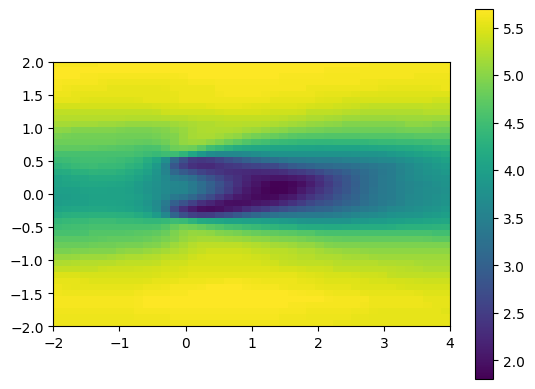

In [40]:
from torchvision import io
from torch import load
from matplotlib import pyplot as plt

wt_diam = 126
lim_around_wt = [2,4,2,2]
size = [44,44]
    
lims = [
    -lim_around_wt[0],
    +lim_around_wt[1],
    -lim_around_wt[2],
    +lim_around_wt[3],
]

path = 'data/generated/validation/real'

image = load(os.path.join(path,'5.76_0.0_(1,2).pt')).cpu()
plt.imshow(image, extent=lims, origin='lower')
plt.colorbar()

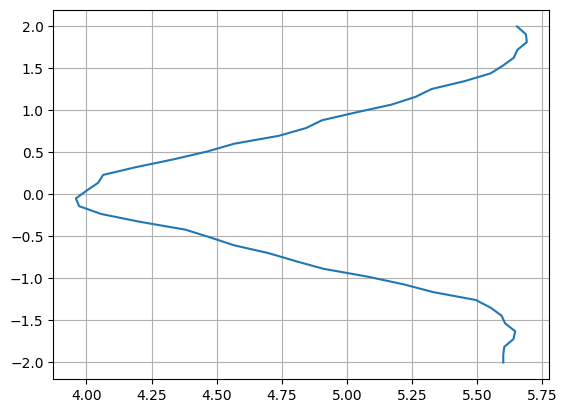

In [38]:
plt.plot(image[:, 0], y/wt_diam)
plt.grid()

(0.0, 12.0)

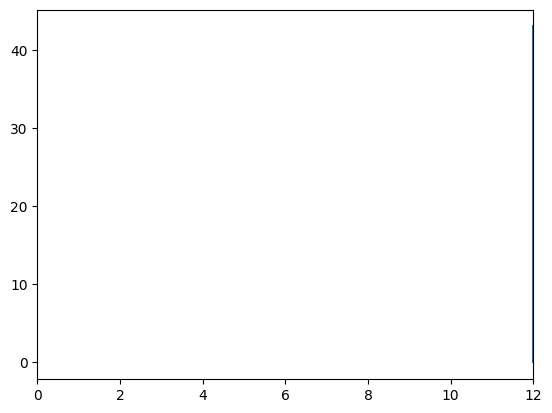

In [31]:
import numpy as np

plt.plot((image.squeeze()[:, 0]/255)*12, np.arange(44))
plt.xlim(0, 12)

In [29]:
import yaml
import numpy as np

wt_diam = 126
lim_around_wt = [2,4,2,2]
size = [44,44]
    
x = np.linspace(
    -wt_diam * lim_around_wt[0],
    +wt_diam * lim_around_wt[1],
)
y = np.linspace(
    -wt_diam * lim_around_wt[2],
    wt_diam * lim_around_wt[3],
    num=size[0],
)

(44,)